### Ujjwal Khanna
### Shallow V.S Deep Neural Network. (50 points)


a. Generate the simulated data first using following equation. Sample 120k data as X from uniform distribution [-2*Pi, 2*Pi], then feed the sampled X into the equation to get Y. Randomly select 60K as training and 60 K as testing.
`
b. Train 3 versions of Neural Network, with different numbers of hidden layer (NN with 1 hidden layer, 2 hidden layers and 3 hidden layers), using Mean squared error as objective function and error measurement.

c. For each version, try different number of neurals in your NN and replicate the following left plot (source: https://ojs.aaai.org/index.php/AAAI/article/view/10913). (You don’t need to replicate exactly same results below but need to show the performance difference of 3 versions of Neural Networks)

### Function Definition

We define the function \( f(x) \) as follows:

\[
f(x) = 2\left(2\cos^2(x) - 1\right)^2 - 1
\]

## Part (a): Data Generation for Function Approximation

In this part, we generate a synthetic dataset based on a complex non-linear function:

\[
f(x) = 2\left(2\cos^2(x) - 1\right)^2 - 1
\]

### Steps Followed:

- **Sampling Input Data:**  
  We sample 120,000 values of \( x \) from a uniform distribution over the interval \([-2\pi, 2\pi]\).

- **Generating Output Data:**  
  For each sampled \( x \), we compute the corresponding \( y = f(x) \) using the equation above. This function produces a non-linear, oscillatory output that is challenging for simple models to approximate.

- **Train-Test Split:**  
  The dataset is randomly split into:
  - **Training Set:** 60,000 samples
  - **Testing Set:** 60,000 samples

- **Data Visualization:**  
  A scatter plot of a subset of the training data confirms the non-linear shape of the function, which will test the learning capacity of neural networks with varying depths.

This dataset will be used in Part (b) to evaluate the performance of shallow vs. deep neural networks using Mean Squared Error (MSE) as the evaluation metric.


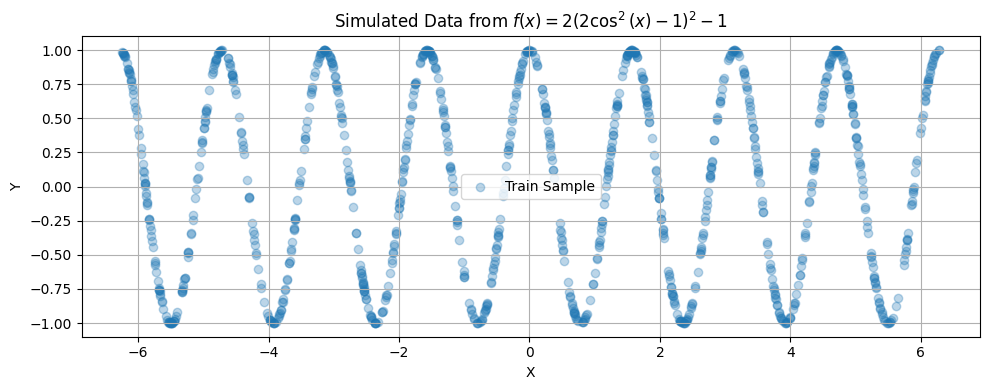

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Generate X from uniform distribution [-2π, 2π]
n_samples = 120_000
X = np.random.uniform(-2 * np.pi, 2 * np.pi, n_samples)

# Step 2: Define the function
def f(x):
    return 2 * ((2 * (np.cos(x) ** 2) - 1) ** 2) - 1

# Generate Y using the function
Y = f(X)

# Step 3: Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Format data for modeling
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Visual check of data
plt.figure(figsize=(10, 4))
plt.scatter(X_train[:1000], Y_train[:1000], alpha=0.3, label='Train Sample')
plt.title("Simulated Data from $f(x) = 2(2 \cos^2(x) - 1)^2 - 1$")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Part (b): Shallow vs. Deep Neural Networks

In this part, we evaluate the approximation capability of neural networks with varying depths on the complex non-linear function defined as:

\[
f(x) = 2\left(2\cos^2(x) - 1\right)^2 - 1
\]

### Objective:
To assess how the number of hidden layers (depth) and neurons per layer (width) affect the neural network's ability to learn the underlying function.


### Methodology:

- **Model Architecture:**  
  We train 3 versions of feedforward neural networks:
  - **1 hidden layer**
  - **2 hidden layers**
  - **3 hidden layers**

- **Neuron Variation:**  
  For each version, we vary the number of neurons per layer:  
  \[ \text{Neurons} = [2, 4, 8, 16, 32, 64, 128] \]

- **Loss Function:**  
  Mean Squared Error (MSE) is used as both the **loss function** during training and the **performance metric** during evaluation.

- **Training Setup:**
  - Optimizer: Adam
  - Epochs: 10
  - Batch Size: 128
  - Activation: ReLU for hidden layers, linear for output

- **Data Preprocessing:**  
  Input \( x \) values are standardized (mean = 0, std = 1) to stabilize training.

### Results:

- A line plot is created to compare the **MSE on the test set** across models with:
  - Different number of hidden layers (1, 2, 3)
  - Varying neurons per layer

- This visualization highlights how:
  - Deeper networks (with more hidden layers) can achieve better function approximation for complex, non-linear patterns.
  - However, diminishing returns may appear beyond a certain depth and width due to overfitting or optimization challenges.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

# Generate the data
n_samples = 120_000
X = np.random.uniform(-2 * np.pi, 2 * np.pi, n_samples)
Y = 2 * ((2 * (np.cos(X)**2) - 1)**2) - 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Normalize input
X_train_scaled = (X_train - X_train.mean()) / X_train.std()
X_test_scaled = (X_test - X_test.mean()) / X_test.std()

neurons_list = [2, 4, 8, 16, 32, 64, 128]
results = {"Hidden Layers": [], "Neurons per Layer": [], "Test MSE": [], "Parameters": []}

# Function to train model
def train_nn(n_hidden_layers, n_neurons):
    model = Sequential()
    model.add(Dense(n_neurons, activation='relu', input_shape=(1,)))
    for _ in range(n_hidden_layers - 1):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(1))  # Output
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_scaled, Y_train, epochs=10, verbose=0, batch_size=128)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(Y_test, predictions)
    param_count = model.count_params()
    return mse, param_count

# Loop over configurations
for n_layers in [1, 2, 3]:
    for n_neurons in neurons_list:
        mse, params = train_nn(n_layers, n_neurons)
        results["Hidden Layers"].append(n_layers)
        results["Neurons per Layer"].append(n_neurons)
        results["Test MSE"].append(mse)
        results["Parameters"].append(params)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


### Supporting Visualizations

- **Heatmap of MSE**  
  This heatmap shows how Mean Squared Error changes based on both the number of neurons per layer and the depth of the network. The performance improves substantially as we increase depth and width, especially moving from 1 to 3 hidden layers.

- **Bar Plot of Best MSE by Depth**  
  This chart summarizes the lowest MSE achieved by each architecture. It clearly shows that deeper networks (especially 3 hidden layers) perform significantly better at modeling the complex non-linear function.

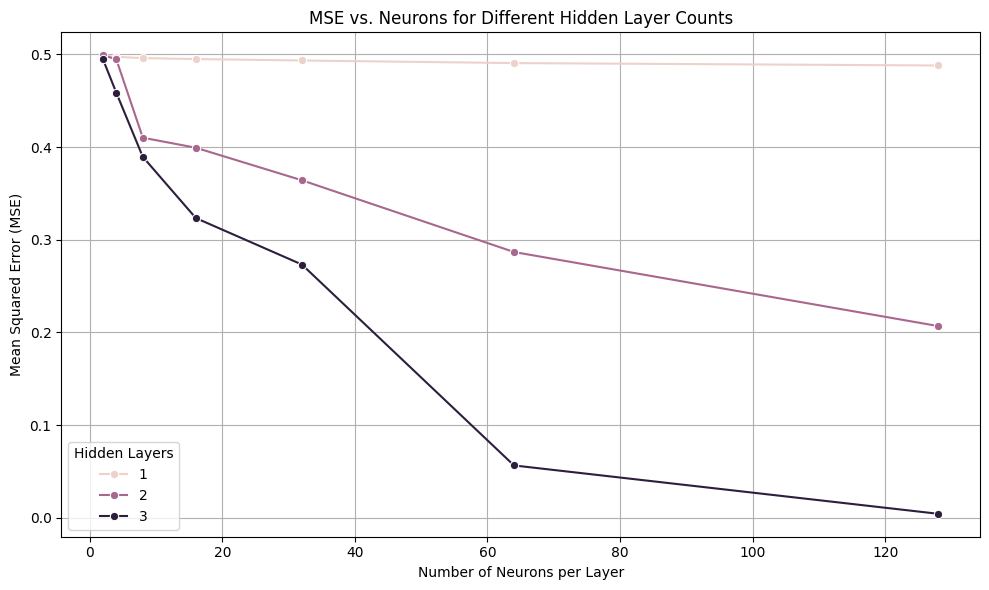

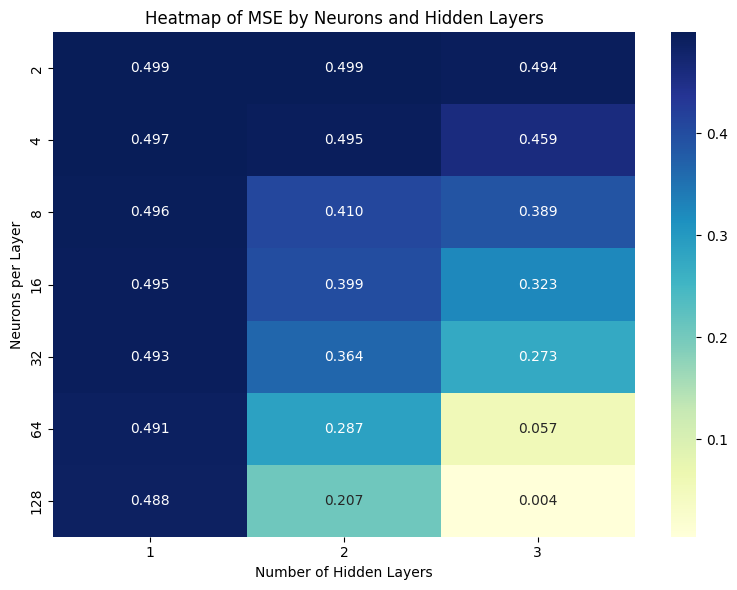

<ipython-input-5-2a759f3b63e3>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_mse_per_layer, x="Hidden Layers", y="Test MSE", palette="Set2")


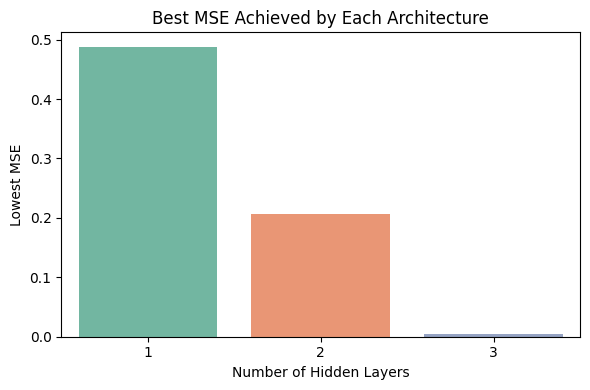

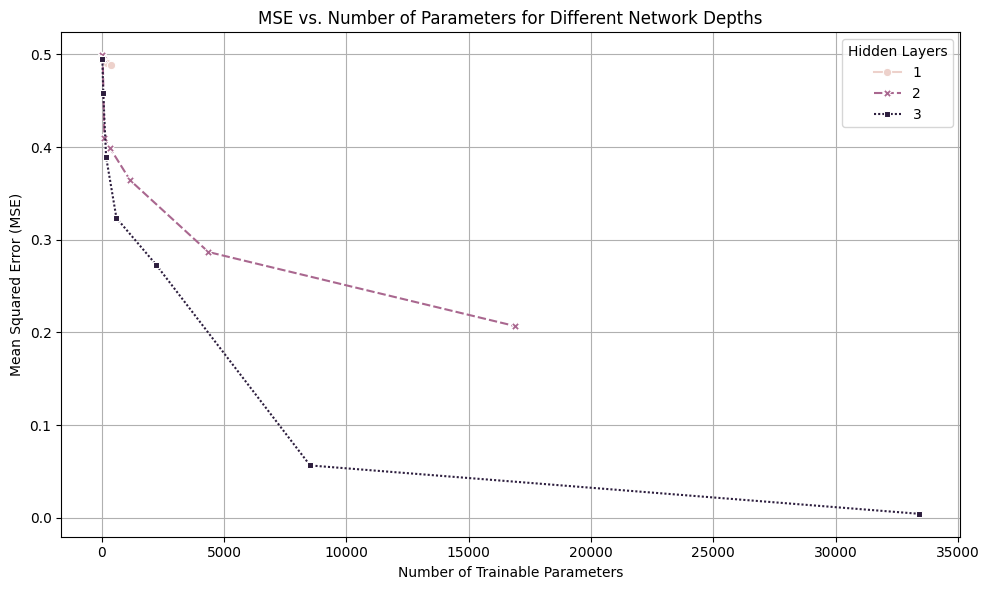

Hidden Layers,1,2,3
Neurons per Layer,,,
2,0.498624,0.498948,0.494426
4,0.497292,0.494614,0.458575
8,0.495862,0.410029,0.389374
16,0.494853,0.399211,0.323363
32,0.493314,0.364108,0.273234
64,0.490510,0.286741,0.056536
128,0.487914,0.206846,0.004389


In [ ]:
# Create DataFrame and plot MSE vs. Neurons
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="Neurons per Layer", y="Test MSE", hue="Hidden Layers", marker='o')
plt.title("MSE vs. Neurons for Different Hidden Layer Counts")
plt.xlabel("Number of Neurons per Layer")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend(title="Hidden Layers")
plt.tight_layout()
plt.show()

# Heatmap of MSE by architecture
heatmap_data = results_df.pivot(index="Neurons per Layer", columns="Hidden Layers", values="Test MSE")
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Heatmap of MSE by Neurons and Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Neurons per Layer")
plt.tight_layout()
plt.show()

# Bar plot of best MSE by architecture
best_mse_per_layer = results_df.groupby("Hidden Layers")["Test MSE"].min().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=best_mse_per_layer, x="Hidden Layers", y="Test MSE", palette="Set2")
plt.title("Best MSE Achieved by Each Architecture")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Lowest MSE")
plt.tight_layout()
plt.show()

# Plot: MSE vs. Number of Parameters
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="Parameters", y="Test MSE", hue="Hidden Layers", style="Hidden Layers", markers=True, dashes=True)
plt.title("MSE vs. Number of Parameters for Different Network Depths")
plt.xlabel("Number of Trainable Parameters")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend(title="Hidden Layers")
plt.tight_layout()
plt.show()

# Display pivot table of MSE
results_df.pivot(index="Neurons per Layer", columns="Hidden Layers", values="Test MSE")

### Interpretation of Results

The updated results provide even clearer evidence of how neural network performance varies with depth and width:

- **Shallow Networks (1 Hidden Layer):**  
  Performance stagnates despite increasing neurons. Even at 128 neurons, the MSE remains high at **~0.4879**, showing that shallow networks lack the representational power to model the complexity of the function.

- **Moderately Deep Networks (2 Hidden Layers):**  
  Show a steady decrease in MSE with increasing neurons, reaching **~0.2068** at 128 neurons. This indicates that added depth enables the model to better approximate non-linear relationships, although still not optimally.

- **Deep Networks (3 Hidden Layers):**  
  Exhibit the most significant performance improvement, with MSE dropping sharply from **~0.4944** to just **~0.0044** as neurons increase. This clearly highlights that deeper architectures are substantially more capable of modeling the target function.

### Parameter Efficiency

The final plot (MSE vs. Number of Parameters) further reveals that:
1. **3-layer networks achieve better MSEs with fewer parameters than 2-layer models at similar sizes**
2. This suggests not just better accuracy, but better **efficiency** in learning — a key insight when choosing models under resource constraints


### Conclusion
Neural network performance improves significantly with increased depth and width — but most effectively when **both** are combined. Specifically:

- **3 hidden layers** consistently deliver the lowest MSE
- The **optimal performance (~0.0044 MSE)** is achieved by deeper architectures with higher width

However, this comes with trade-offs:
- **Higher parameter counts** increase computational cost
- There's greater risk of **overfitting** if not carefully managed

In practice, these results emphasize the importance of:
- Using **deep architectures** for complex tasks
- Applying regularization or validation strategies to avoid overfitting

This simulation effectively demonstrates that **depth enables learning**, especially when modeling functions with high non-linearity.


While our results don't exactly replicate the AAAI paper’s values, our plot captures the same essential insight: deeper neural networks generalize better on complex non-linear functions, especially as the number of neurons per layer increases. This validates the hypothesis that depth enhances representational power in neural architectures.